# Prepare data

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 

Read raw data from csv

In [ ]:
raw_dataset = pd.read_csv('datasets/vMOS.csv', index_col='ID')
X_raw = raw_dataset.drop("VMOS", 1)
y = raw_dataset['VMOS']

Select features according to the k highest scores. </br>
The **f_regression** score function will rank features in the same order if all the features are positively correlated with the target.

In [3]:
def select_features(X: pd.DataFrame, y: pd.Series, k=10):
	selector = SelectKBest(score_func=f_regression, k=k)
	selector.fit(X, y)
	return X[X.columns[selector.get_support(indices=True)]], selector

Split dataset into train and test subsets

In [4]:
X, fs = select_features(X_raw, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Display feature's scores

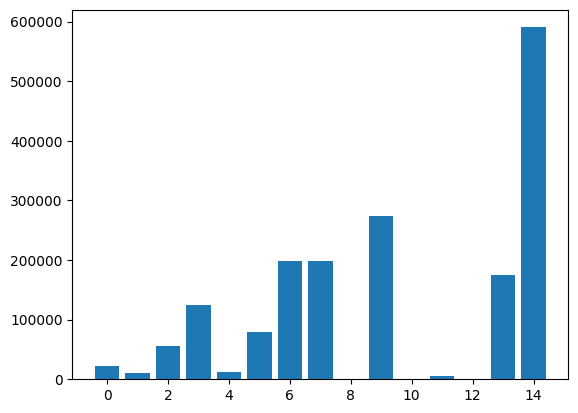

In [5]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Machine Learning

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Declare some machine learning models with default params

In [7]:
linear = LinearRegression()
svr = SVR()
random_forest = RandomForestRegressor()
bagging = BaggingRegressor()
ada_boost = AdaBoostRegressor()
gradient_boost = GradientBoostingRegressor()
models = [('linear', linear), ('svr', svr), ('random_forest',
                                                      random_forest), ('bagging', bagging), ('ada_boost', ada_boost), ('gradient_boost', gradient_boost)]


Training all models

In [8]:
for name, model in models:
    model.fit(X_train, y_train)

Predict and compute **mean_squared_error** of each model

In [9]:
preds = list(map(lambda model : model[1].predict(X_test), models))
ml_mses = list(map(lambda model, pred : (model[0], mean_squared_error(y_test, pred)), models, preds))

# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.metrics import MeanSquaredError

Build **LSTM** model

In [11]:
def build_model(number_of_feature):
    model = Sequential()
    model.add(LSTM(128, return_sequences=False,
              input_shape=(number_of_feature, 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(Dropout(0.2))
    # model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam',
                  loss='mse', metrics=[MeanSquaredError()])
    return model

In [ ]:
lstm = build_model(10)

Training model

In [13]:
lstm.fit(X_train, y_train, validation_split=0.05,
         batch_size=128, epochs=100, shuffle=True)


Epoch 1/100


2022-11-16 23:59:07.151051: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-16 23:59:08.190457: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


531/531 [==============================] - 8s 9ms/step - loss: 0.4804 - mean_squared_error: 0.4804 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 2/100
531/531 [==============================] - 4s 7ms/step - loss: 0.1910 - mean_squared_error: 0.1910 - val_loss: 0.4278 - val_mean_squared_error: 0.4278
Epoch 3/100
531/531 [==============================] - 4s 7ms/step - loss: 0.1564 - mean_squared_error: 0.1564 - val_loss: 0.1170 - val_mean_squared_error: 0.1170
Epoch 4/100
531/531 [==============================] - 4s 7ms/step - loss: 0.1357 - mean_squared_error: 0.1357 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 5/100
531/531 [==============================] - 4s 7ms/step - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 6/100
531/531 [==============================] - 4s 7ms/step - loss: 0.1315 - mean_squared_error: 0.1315 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 7/100
531/531 [=============

Predict and compute **MSE**

In [14]:
lstm_pred = lstm.predict(X_test)
lstm_mse = mean_squared_error(y_test, lstm_pred)
# lstm_pred

558/558 [==============================] - 2s 2ms/step


Print all MSE

In [15]:
mses = ml_mses + [('lstm', lstm_mse)]
for name, mse in mses:
    print(name + ": ", mse)

linear:  0.003930137239138814
svr:  0.006164690311306513
random_forest:  6.1007789851013655e-05
bagging:  7.195071132519344e-05
ada_boost:  0.013671146902181793
gradient_boost:  0.00012842182785427437
lstm:  0.0005318632382064247
